In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
# from keras.optimizers import Adam
from tensorflow.keras.models import Model
#from sklearn.metrics import confusion_matrix
import itertools
#import imutils
import scipy.io



In [10]:
test_data = scipy.io.loadmat('test_data.mat')
train_data = scipy.io.loadmat('train_data.mat')
train_list = scipy.io.loadmat('lists/train_list.mat')
test_list = scipy.io.loadmat('lists/test_list.mat')
file_list = scipy.io.loadmat('lists/file_list.mat')

In [136]:
train_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012',
 '__version__': '1.0',
 '__globals__': [],
 'train_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
       dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
        [array([

In [4]:
train_list['annotation_list']

array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9333'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_2503'], dtype='<U44')]],
      dtype=object)

In [137]:
train_path = 'Train_images'
valid_path = 'Validate_images'
test_path = 'Test_images'

# '/Users/keeshanwilliams/OneDrive - CUNY/My Stuff/Galvenize/DSI/Capstone Projects/Classifictaion_of_Dogs/Train_images/Chihuahua'

In [167]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['Chihuahua','Japanese Spaniel','Maltese Dog'], batch_size=6)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['Chihuahua','Japanese Spaniel','Maltese Dog'], batch_size=6)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['Chihuahua','Japanese Spaniel','Maltese Dog'], batch_size=6)

Found 413 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [168]:
imgs, labels = next(train_batches)
label_class = ['Chihuahua','Japanese Spaniel','Maltese Dog']

In [169]:
len(labels)

6

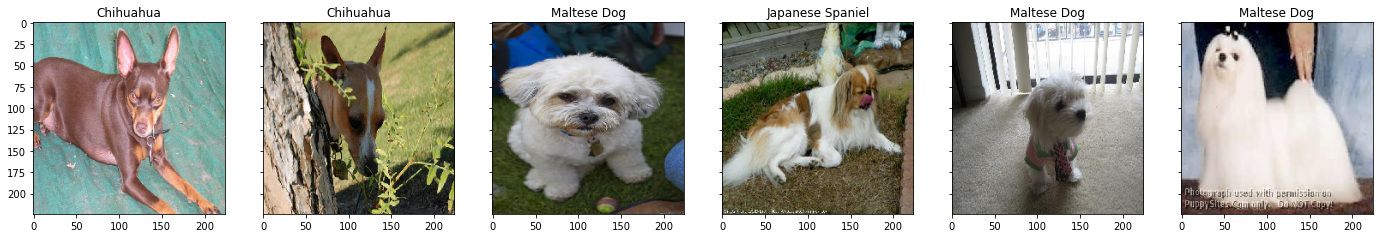

In [170]:
fig, ax = plt.subplots(1, len(labels), figsize = (24, 12), sharey=True)

for i in range(len(labels)):
    ax[i].imshow(imgs[i]/255)
    ax[i].set_title(label_class[np.argmax(labels[i])])
# # plots(imgs, titles=labels)
# imgs[0].shape

In [145]:
label_class = ['Chihuahua','Japanese Spaniel','Maltese Dog']
label_class[np.argmax(labels[0])]

'Maltese Dog'

In [121]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [122]:
Dir_Class_Model = Sequential()
for layer in vgg16_model.layers[:-1]:
    Dir_Class_Model.add(layer)

In [123]:
for layer in Dir_Class_Model.layers[:-1]:
    layer.trainable = False

In [124]:
num_classes = 3
Dir_Class_Model.add(Dense(num_classes, activation='softmax'))

In [125]:
Dir_Class_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [126]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [127]:
Dir_Class_Model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [128]:
Dir_Class_Model.fit(train_batches, validation_data=valid_batches, epochs=5, verbose=1)

Epoch 1/5
69/69 [==============================] - 1184s 17s/step - loss: 0.2734 - accuracy: 0.9225 - val_loss: 0.0297 - val_accuracy: 0.9914
Epoch 2/5
69/69 [==============================] - 1322s 19s/step - loss: 0.0171 - accuracy: 0.9952 - val_loss: 0.0507 - val_accuracy: 0.9741
Epoch 3/5
69/69 [==============================] - 1252s 18s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9741
Epoch 4/5
69/69 [==============================] - 951s 14s/step - loss: 8.0340e-04 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9741
Epoch 5/5
69/69 [==============================] - 769s 11s/step - loss: 6.8550e-04 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9741


In [129]:
test_imgs, test_labels = next(test_batches)
Dir_Class_Model.predict(test_imgs)

array([[1.5874184e-07, 9.9999630e-01, 3.5176004e-06],
       [1.3150185e-02, 2.0071800e-06, 9.8684782e-01],
       [2.2106305e-04, 1.5247948e-04, 9.9962640e-01],
       [4.5515005e-02, 5.8370870e-06, 9.5447916e-01],
       [8.4284402e-04, 9.7419626e-01, 2.4960907e-02],
       [9.9970102e-01, 2.9473886e-04, 4.2389602e-06]], dtype=float32)

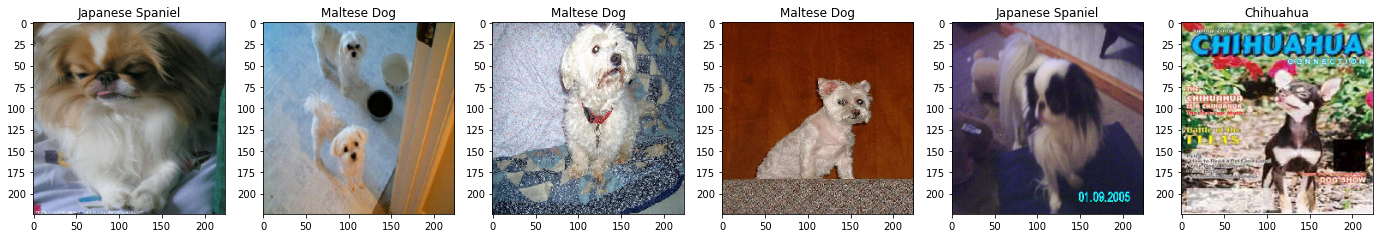

In [163]:
fig, ax = plt.subplots(1, len(test_labels), figsize = (24, 12))

for i in range(len(test_labels)):
    ax[i].imshow(test_imgs[i]/255)
    ax[i].set_title(label_class[np.argmax(test_labels[i])])

In [158]:
7.62+33.3-73.90+69.60+33.75

70.36999999999998

In [192]:
labels
y_test = []
y_pred = []
# y_test  = [y_test.append(label_class[np.argmax(labels[i])]) for i in range(len(labels))]
for i in range(len(labels)): 
    y_test.append(label_class[np.argmax(labels[i])])
    y_pred.append(label_class[np.argmax(test_labels[i])])

['Chihuahua',
 'Chihuahua',
 'Maltese Dog',
 'Japanese Spaniel',
 'Maltese Dog',
 'Maltese Dog']

In [193]:
y_pred

['Japanese Spaniel',
 'Maltese Dog',
 'Maltese Dog',
 'Maltese Dog',
 'Japanese Spaniel',
 'Chihuahua']

In [166]:
test_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [194]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
cf_matrix = confusion_matrix(y_pred, y_test, labels=label_class)


array([[0, 0, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
# precision = precision_score(y_pred, y_test)
# reacall = recall_score(y_pred, y_test)
# f1 = f1_score(y_pred, y_test)
group_counts = ["{0:0.0f}\n".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0],cf_matrix.shape[1])

plt.figure(figsize = (12, 8))
plt.rcParams['font.size'] = 14
sns.heatmap(cf_matrix, annot=box_labels, fmt='', cmap='Blues',xticklabels=label_class,yticklabels=label_class)
plt.yticks(rotation = 90, va = 'center')
plt.xlabel('True Label', FontSize = 20)
plt.ylabel('Predicted Label', FontSize = 20)
plt.title('Accuracy: {:.2%}'.format(accuracy))